# EDA

## Importing Libraries

In [1]:
#!pip install pivottablejs
#!pip install sweetviz
#!pip install dataprep

In [2]:
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the dataframe

### Reading csv

In [3]:
df=pd.read_csv('Files/'+'Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Exploration of the rows and columns

### Counting nulls

In [4]:
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

The dataframe appears to be free of null values; however, this is due to the replacement of nulls with numbers and tags for machine learning algorithm compatibility. To view the authentic data, we will substitute these numbers with their corresponding tags.

In [5]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

Columns amount

In [6]:
len(df.columns)

21

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Most of the columns are integer, except date died which should be a datetime column, but is object (string). Let's make the required changes.

## Data cleaning

Let's replace the values 97, 98 and 99 with NaN (null), as it was mentioned in the dataset description.

In [8]:
columns_to_exclude = ['USMER', 'MEDICAL_UNIT', 'AGE', 'CLASIFFICATION_FINAL']

df.loc[:, ~df.columns.isin(columns_to_exclude)] = df.loc[:, ~df.columns.isin(columns_to_exclude)].replace({97: np.nan, 98: np.nan, 99: np.nan})

We need to replace the '9999-99-99' value by null

In [9]:
df['DIED'] = df['DATE_DIED'].apply(lambda x: 'no' if x == '9999-99-99' else ('yes' if pd.notna(x) else np.nan))

In [10]:
# Replace '9999-99-99' in the 'DATE_DIED' column with NaN (null)
df['DATE_DIED'] = df['DATE_DIED'].replace({'9999-99-99': np.nan})

# Convert 'DATE_DIED' column to datetime
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'])

C:\Users\edwin\AppData\Local\Temp\ipykernel_34500\1449240428.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'])


Then need to change tags for each column.

In [11]:
# Replace numerical values with tags
replacement_mapping = {
    'SEX': {1: 'Female', 2: 'Male'},
    'PATIENT_TYPE': {1: 'Returned Home', 2: 'Hospitalization'},
    'INTUBED': {1: 'Yes', 2: 'No'},
    'PNEUMONIA': {1: 'Yes', 2: 'No'},
    'PREGNANT': {1: 'Yes', 2: 'No'},
    'DIABETES': {1: 'Yes', 2: 'No'},
    'COPD': {1: 'Yes', 2: 'No'},
    'ASTHMA': {1: 'Yes', 2: 'No'},
    'INMSUPR': {1: 'Yes', 2: 'No'},
    'HIPERTENSION': {1: 'Yes', 2: 'No'},
    'OTHER_DISEASE': {1: 'Yes', 2: 'No'},
    'CARDIOVASCULAR': {1: 'Yes', 2: 'No'},
    'OBESITY': {1: 'Yes', 2: 'No'},
    'RENAL_CHRONIC': {1: 'Yes', 2: 'No'},
    'TOBACCO': {1: 'Yes', 2: 'No'},
    'CLASIFFICATION_FINAL': {1: 'COVID-1', 2: 'COVID-2', 3: 'COVID-3', 4: 'Not COVID or Inconclusive'},
    'ICU': {1: 'Yes', 2: 'No'}
}

# Update the 'CLASIFFICATION_FINAL' column
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].apply(lambda x: 'Not COVID or Inconclusive' if x >= 4 else x)

df.replace(replacement_mapping, inplace=True)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,Female,Returned Home,2020-03-05,NaN,Yes,65,No,No,...,No,Yes,No,No,No,No,No,COVID-3,NaN,yes
1,2,1,Male,Returned Home,2020-03-06,NaN,Yes,72,NaN,No,...,No,Yes,No,No,Yes,Yes,No,Not COVID or Inconclusive,NaN,yes
2,2,1,Male,Hospitalization,2020-09-06,Yes,No,55,NaN,Yes,...,No,No,No,No,No,No,No,COVID-3,No,yes
3,2,1,Female,Returned Home,2020-12-06,NaN,No,53,No,No,...,No,No,No,No,No,No,No,Not COVID or Inconclusive,NaN,yes
4,2,1,Male,Returned Home,2020-06-21,NaN,No,68,NaN,Yes,...,No,Yes,No,No,No,No,No,COVID-3,NaN,yes


Let's review the final amount of nulls and the data type. 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   USMER                 1048575 non-null  int64         
 1   MEDICAL_UNIT          1048575 non-null  int64         
 2   SEX                   1048575 non-null  object        
 3   PATIENT_TYPE          1048575 non-null  object        
 4   DATE_DIED             76942 non-null    datetime64[ns]
 5   INTUBED               192706 non-null   object        
 6   PNEUMONIA             1032572 non-null  object        
 7   AGE                   1048575 non-null  int64         
 8   PREGNANT              521310 non-null   object        
 9   DIABETES              1045237 non-null  object        
 10  COPD                  1045572 non-null  object        
 11  ASTHMA                1045596 non-null  object        
 12  INMSUPR               1045171 non-null  ob

Let's change the column names

In [13]:
# Rename and tag the columns as before
column_mapping = {
    'USMER': 'USMER',
    'MEDICAL_UNIT': 'Medical Unit',
    'SEX': 'Sex',
    'PATIENT_TYPE': 'Patient Type',
    'DATE_DIED': 'Date Died',
    'INTUBED': 'Intubed',
    'PNEUMONIA': 'Pneumonia',
    'AGE': 'Age of Patient',
    'PREGNANT': 'Pregnant',
    'DIABETES': 'Diabetes',
    'COPD': 'COPD',
    'ASTHMA': 'Asthma',
    'INMSUPR': 'Immunosuppressed',
    'HIPERTENSION': 'Hypertension',
    'OTHER_DISEASE': 'Other Disease',
    'CARDIOVASCULAR': 'Cardiovascular',
    'OBESITY': 'Obesity',
    'RENAL_CHRONIC': 'Renal Chronic',
    'TOBACCO': 'Tobacco User',
    'CLASIFFICATION_FINAL': 'Classification',
    'ICU': 'ICU Admission',
    'DIED': 'Died'
}

df.rename(columns=column_mapping, inplace=True)

## Final data report

With the SweetViz library we can produce a data report to analyze each column separately. 

                                             |          | [  0%]   00:00 -> (? left)


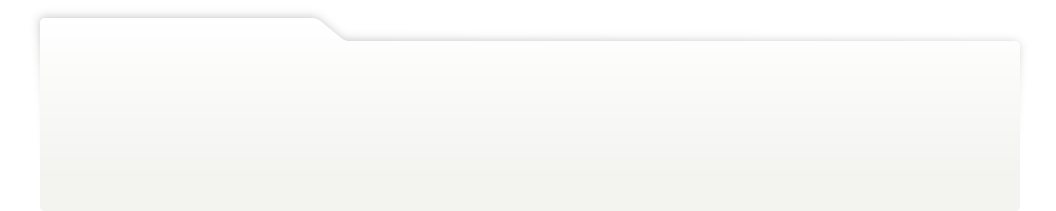
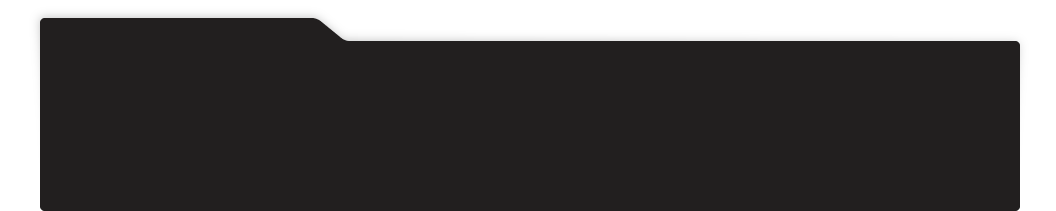
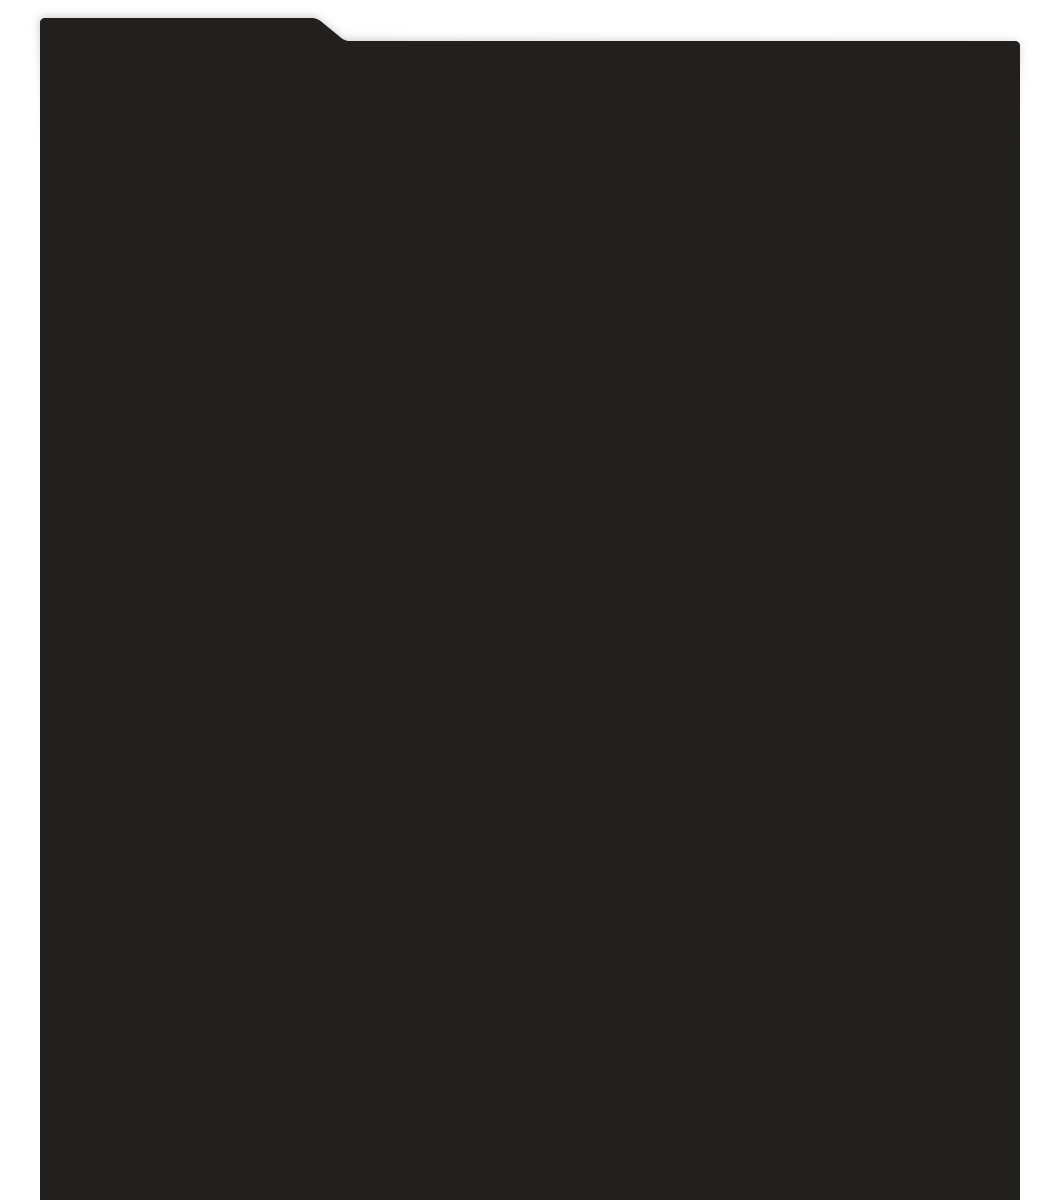
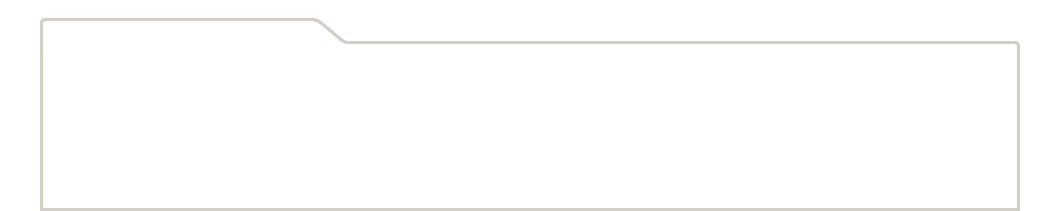
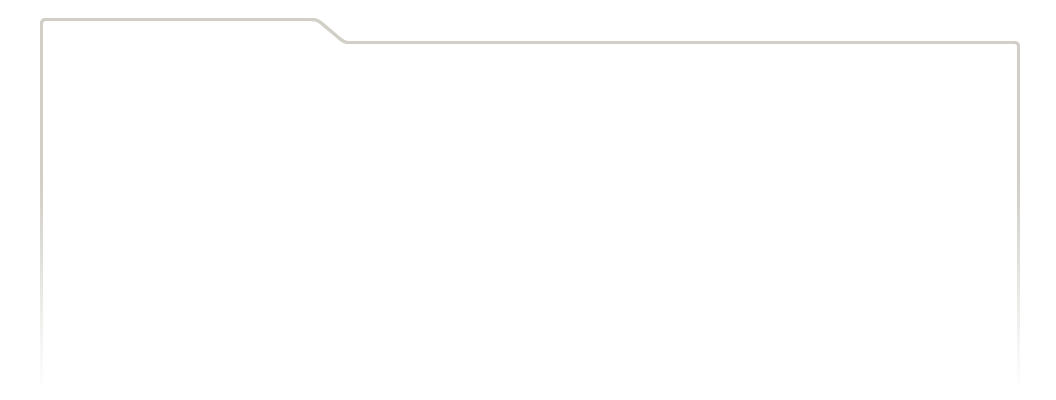
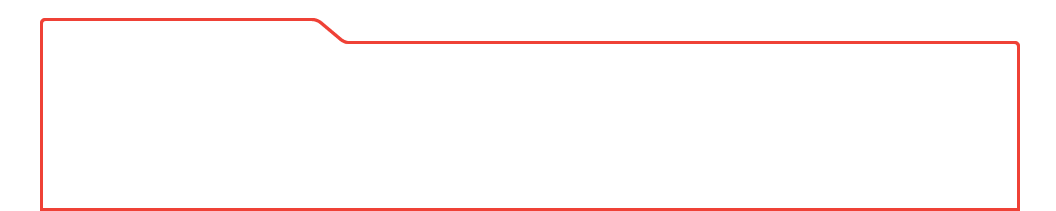
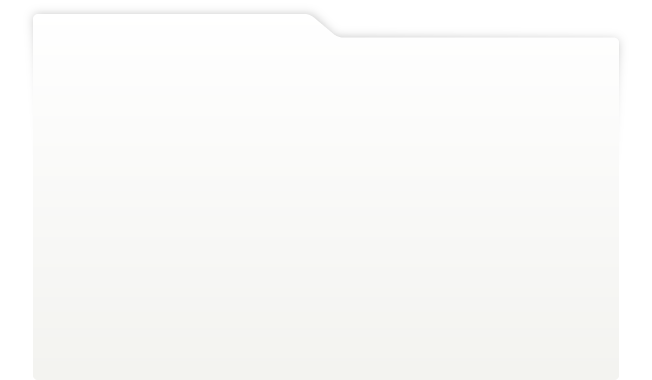
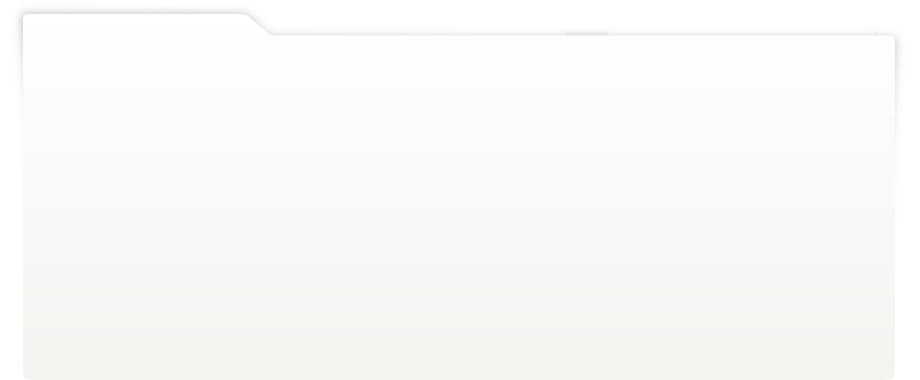
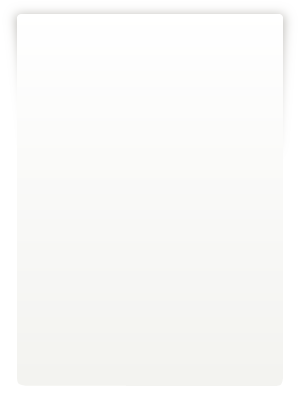
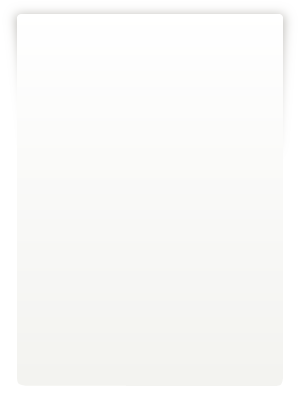
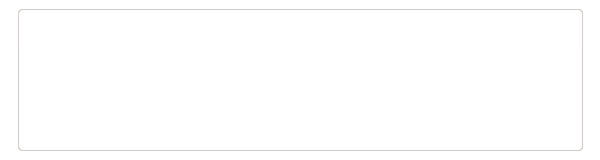
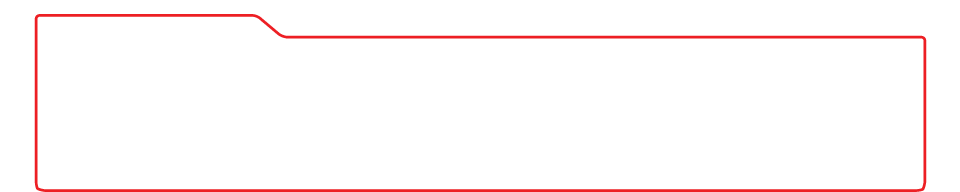
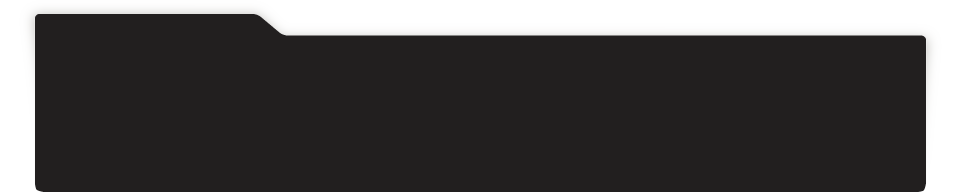
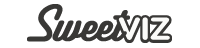
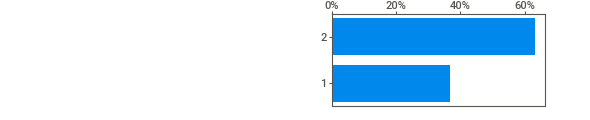
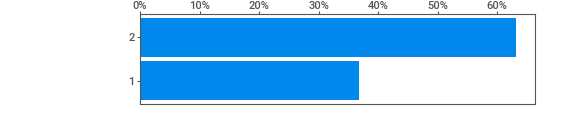
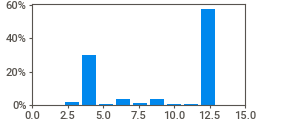
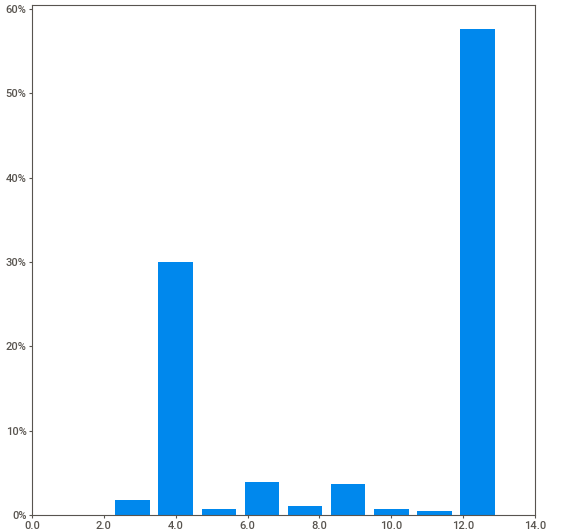
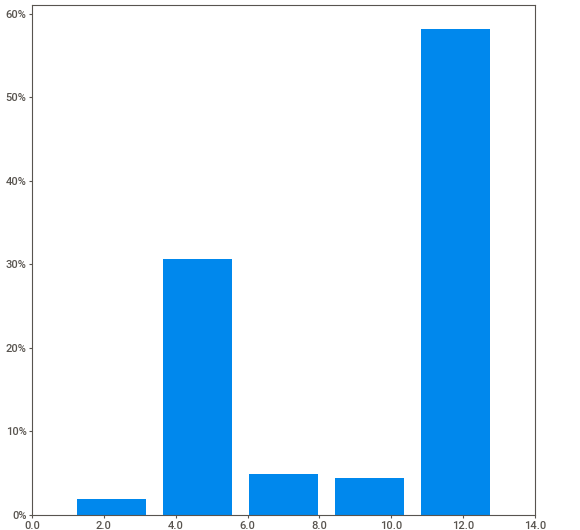
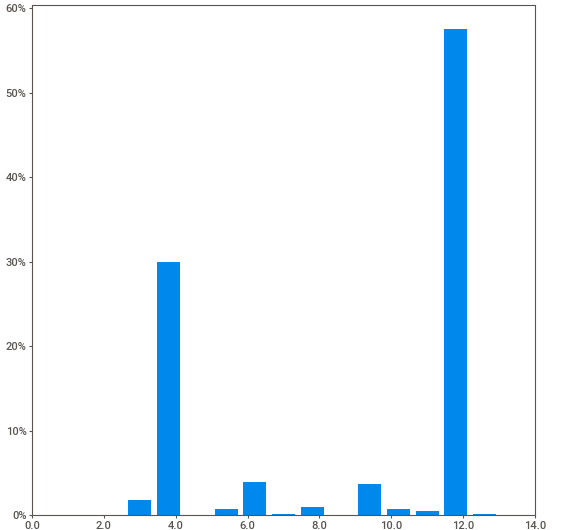
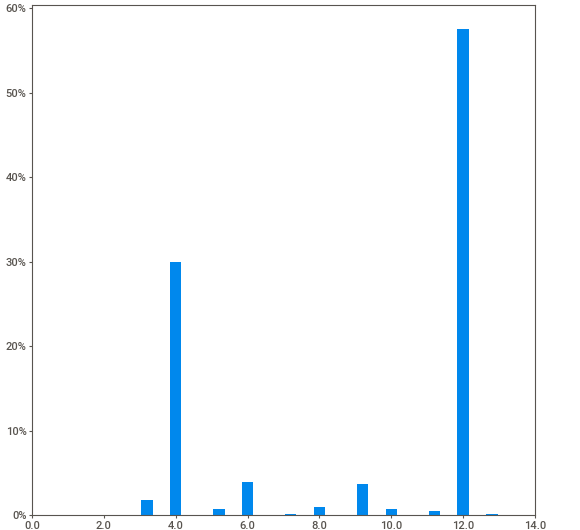
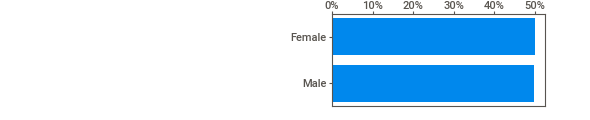
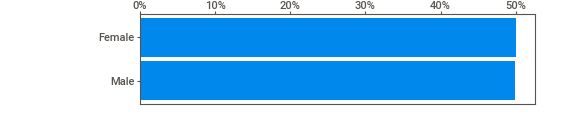
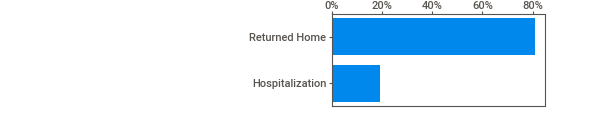
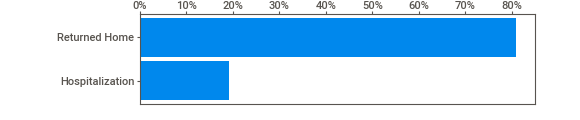
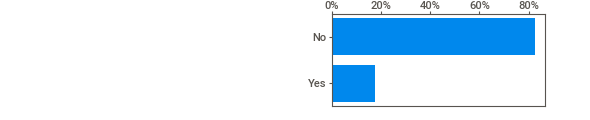
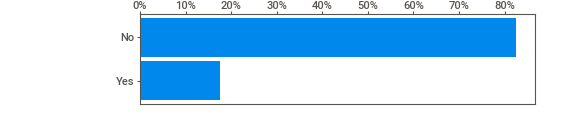
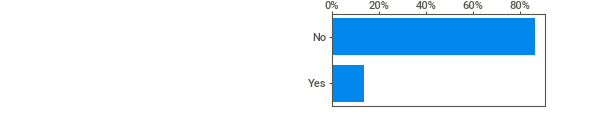
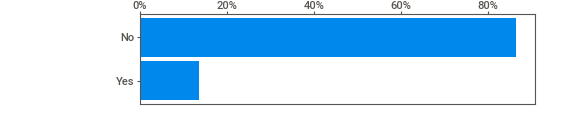
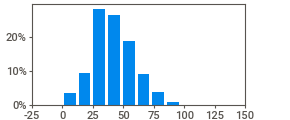
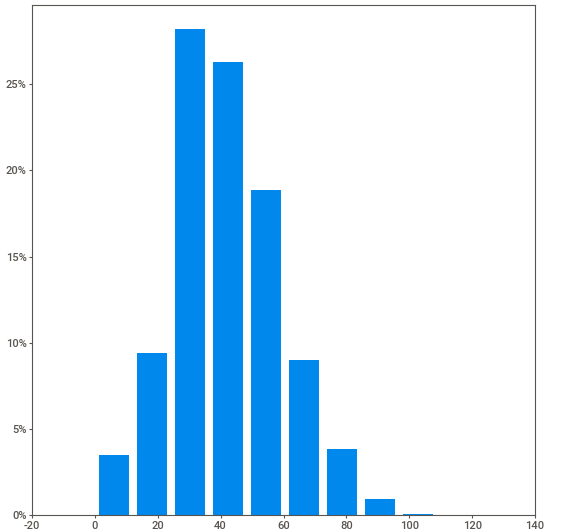
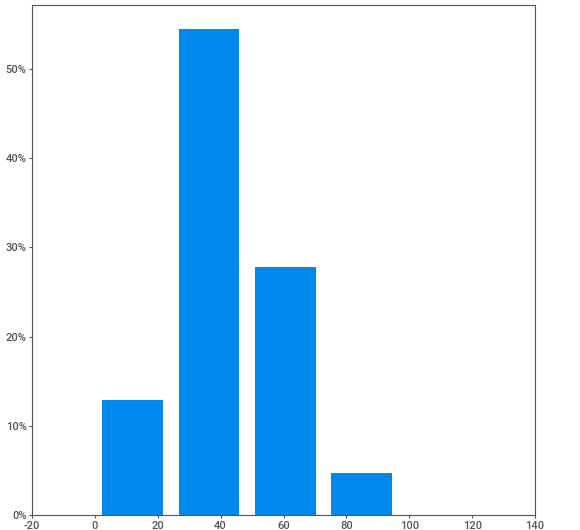
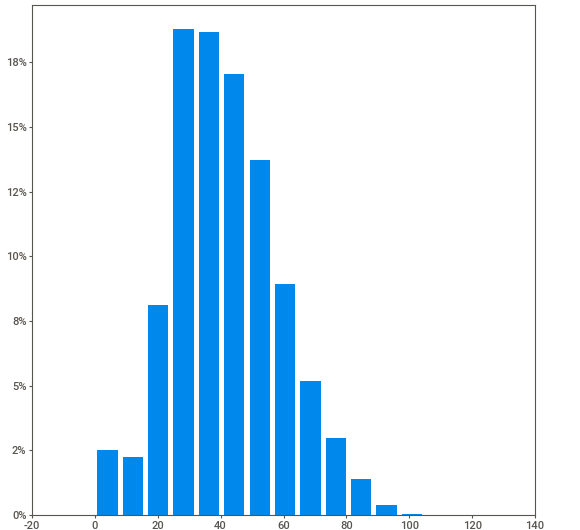
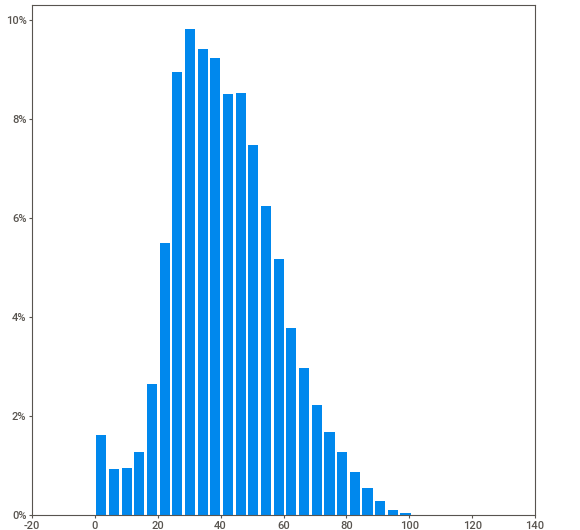
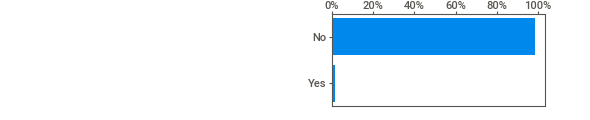
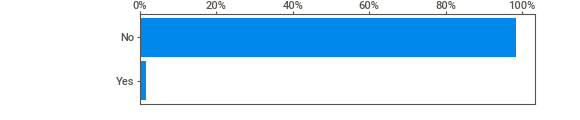
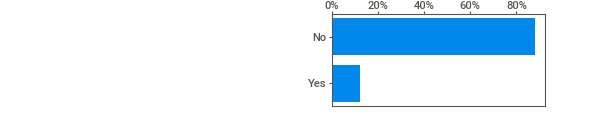
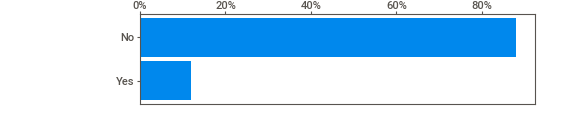
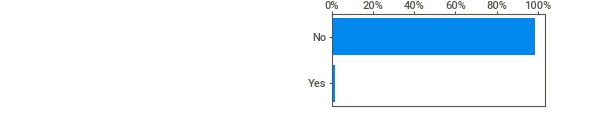
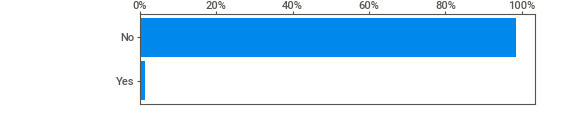
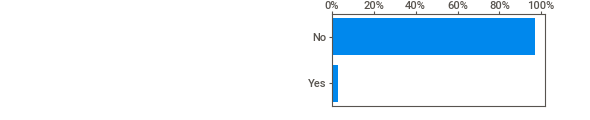
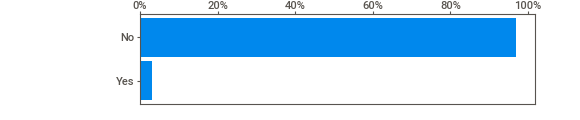
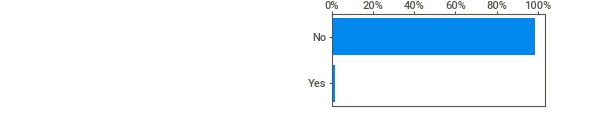
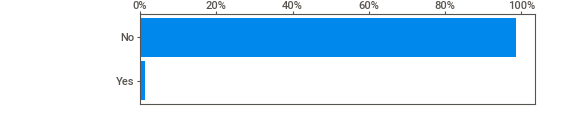
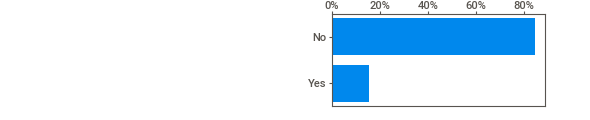
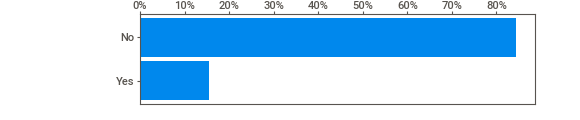
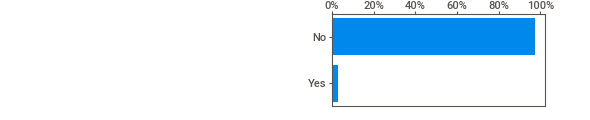
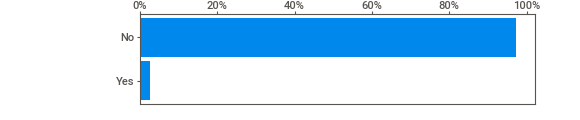
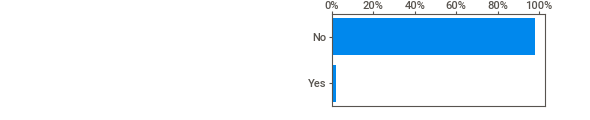
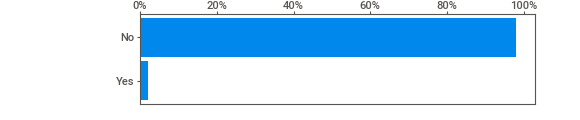
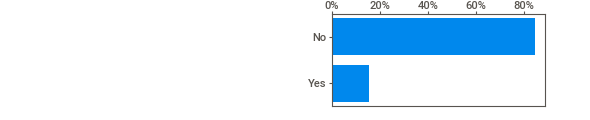
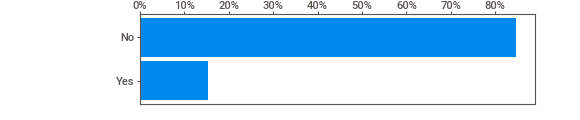
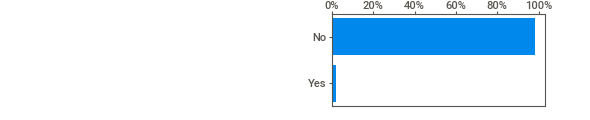
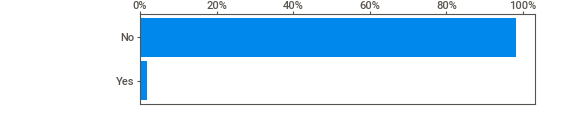
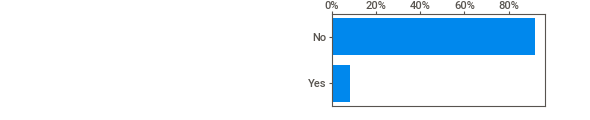
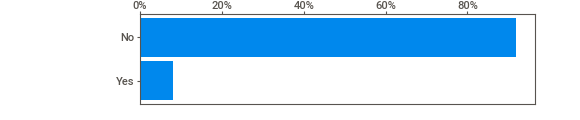
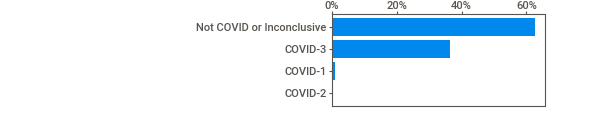
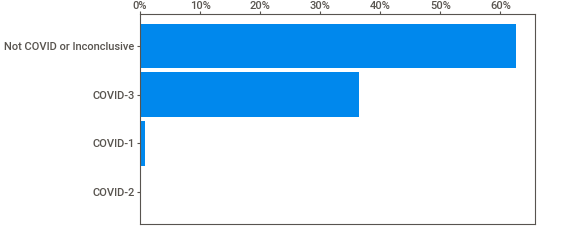
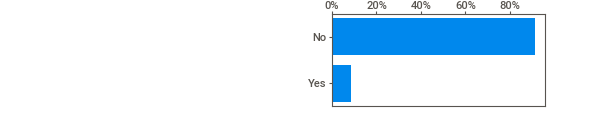
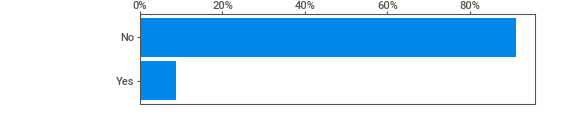
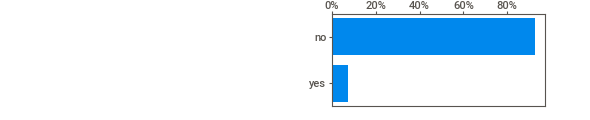
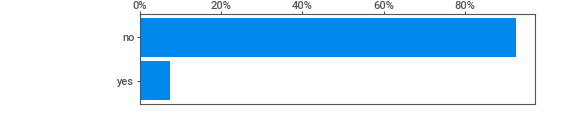
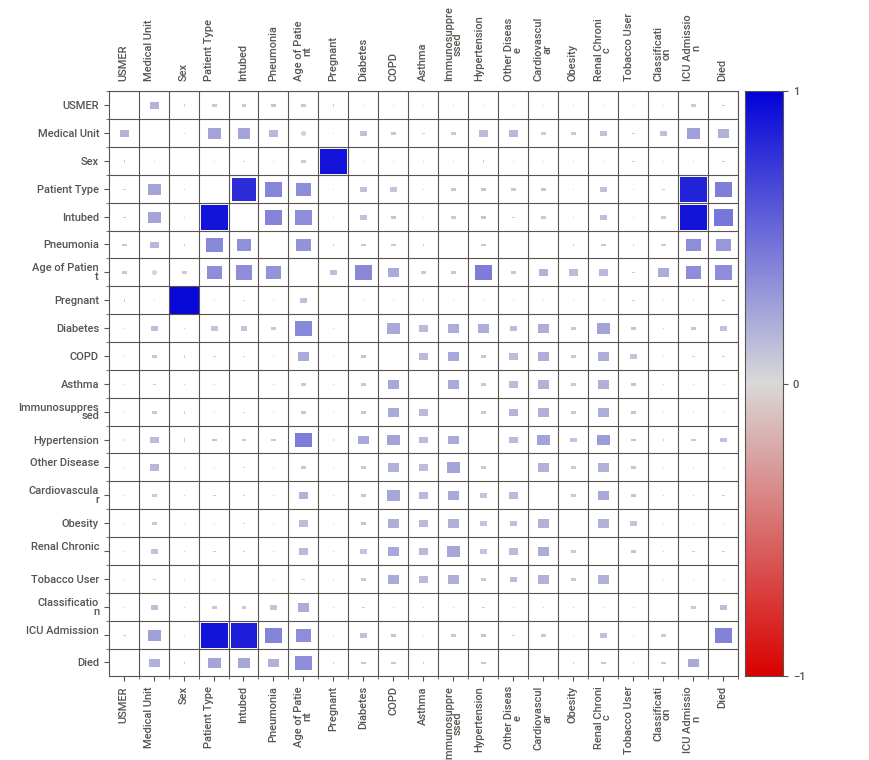
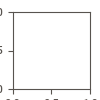

In [14]:
sv_report = sv.analyze(df) 
sv_report.show_notebook()

In [15]:
sv_report.show_html('analyze.html',open_browser=False)

Report analyze.html was generated.


## Exporting CSV

Finally, we export the clean dataset.

In [16]:
df.to_csv("Cleaned_DF.csv")